In [1]:
# Librerias a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [2]:
# Leo los CSV a utilizar

#df_cour = pd.read_csv("Coursera_courses.csv")
#df_edx = pd.read_csv("edx_courses.csv")
#df_udemy = pd.read_csv("udemy_courses.csv")
#df_cour_rev = pd.read_csv("Coursera_reviews.csv")

A continuacion, se procede a analizar cada academia por separado, realizando primero el proceso de ETL y luego el de EDA

# DATAFRAMES COURSERA (ETL - EDA)

Luego de visualizar el contenido de cada csv, se procede:

In [3]:
#Elimino duplicados en el dataset de reviews de coursera

#df_cour_rev = df_cour_rev.drop_duplicates()

In [4]:
# De coursera_reviews me interesa conseguir el promedio de rating de cada curso, y la cantidad de cursantes que dieron la opinion de cada uno

#promedio_puntaje = df_cour_rev.groupby('course_id')['rating'].mean()
#conteo_valores = df_cour_rev.groupby('course_id')['rating'].count()

In [5]:
# Les doy una columna a los index generados y las nombro adecuadamente

#conteo_valores = conteo_valores.reset_index()
#conteo_valores.columns = ['course_id', 'cursantes']
#df_promedio= promedio_puntaje.reset_index()

In [6]:
# Uno los csv coursera_courses y coursera_reviews por el ID

#df_merged = pd.merge(df_promedio, df_cour, on='course_id')
#df_merged = pd.merge(df_merged, conteo_valores, on='course_id')

In [7]:
# Me quedo con las columnas que pueden aportar valor al analisis

#df_cour = df_merged.drop(['course_id'], axis=1, inplace = True)
#df_cour = df_merged.drop(['course_url'], axis=1)

In [8]:
#Renombro las columnas

#df_cour.columns = ['puntaje', 'titulo',"institucion","cantidad_opiniones"]

In [9]:
#Exporto el csv limpio y lo leo 

#df_cour.to_csv('dfLimpio/dfCoursera.csv', index=False)

In [10]:
#Leo el csv limpio
df_cour = pd.read_csv("dfCoursera.csv")

In [11]:
#Visualizo el df_cour limpio
df_cour.head()

,puntaje,titulo,institucion,cantidad_opiniones
0,4.552239,Aboriginal Worldviews and Education,University of Toronto,67
1,4.466667,Access Controls,(ISC)²,45
2,4.395299,Accounting Analytics,University of Pennsylvania,468
3,3.500000,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,8
4,4.845850,Actualización en el manejo del paciente con di...,Universidad Nacional Autónoma de México,253


In [12]:
#Visualizo la info del dataframe
df_cour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   puntaje             604 non-null    float64
 1   titulo              604 non-null    object 
 2   institucion         604 non-null    object 
 3   cantidad_opiniones  604 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 19.0+ KB


In [13]:
#Contabilizo los distintos valores de la columna institucion
print("Conteo de columna institucion\n")
print(df_cour["institucion"].value_counts())

Conteo de columna institucion

University of Pennsylvania         43
University of Michigan             31
Duke University                    23
Google Cloud                       22
IBM                                18
                                   ..
ESCP Business School                1
Case Western Reserve University     1
INSEAD                              1
EDHEC Business School               1
E-Learning Development Fund         1
Name: institucion, Length: 132, dtype: int64


In [14]:
#Analizo las variables numericas de coursera
df_cour.describe()

,puntaje,cantidad_opiniones
count,604.000000,604.000000
mean,4.619780,860.839404
std,0.394290,1608.604971
min,1.000000,1.000000
25%,4.551803,132.750000
50%,4.717742,387.500000
75%,4.814681,847.750000
max,5.000000,15226.000000


<Axes: ylabel='cantidad_opiniones'>

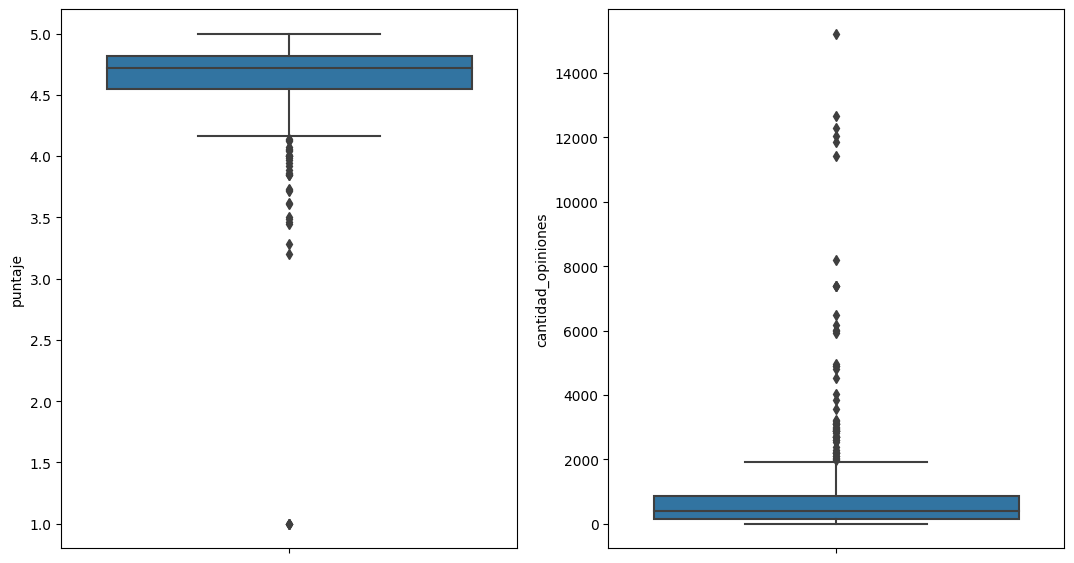

In [15]:
#Analizo con boxplot las variables numericas
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

sns.boxplot(data=df_cour, y="puntaje", ax=ax1)
sns.boxplot(data=df_cour, y="cantidad_opiniones", ax=ax2)


Observamos que en la columna puntaje, la mayoria de los registros van desde aproximadamente 4 a 5 puntos, con algunas excepciones. <br>
Por el lado de la cantidad de opiniones, los cursos mas populares (o con mas opiniones) varian entre las 10 mil y 14 mil opiniones, mientras que el promedio se mantiene entre poco mas de 0 y 2 mil.

In [16]:
#Del dataframe limpio de coursera, se extraen las primeras 15 filas ordenadas por puntaje, cuando la cantidad de opiniones sea mayor a 500
top_15_puntaje = df_cour[df_cour['cantidad_opiniones'] > 500]
top_15_puntaje = top_15_puntaje.sort_values('puntaje', ascending=False).head(15)
top_15_puntaje

,puntaje,titulo,institucion,cantidad_opiniones
182,4.929530,Everyday Parenting: The ABCs of Child Rearing,Yale University,596
538,4.929504,The Science of Well-Being,Yale University,8199
137,4.922148,Dino 101: Dinosaur Paleobiology,University of Alberta,745
21,4.919417,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,3090
484,4.919129,Writing in the Sciences,Stanford University,1286
162,4.914115,Teach English Now! Foundational Principles,Arizona State University,2678
302,4.909091,Introduction to Classical Music,Yale University,792
27,4.905097,Hacia una práctica constructivista en el aula,Pontificia Universidad Católica de Chile,569
362,4.904135,Medical Neuroscience,Duke University,532
152,4.899135,Understanding Einstein: The Special Theory of ...,Stanford University,694


Se realiza un filtro por mayor puntaje (considerando un minimo 500 opiniones para ser tenidas en cuenta). <br>
Se observa que en los primeros 15 puestos de rating son variadas las disciplinas que aparecen, y que no son las que mayor cantidad de opiniones tienen.<br> Lo cual muestra que NO hay una relacion marcada entre el puntaje, las mas populares o algun tipo de disciplina en particular que ofrece coursera.

In [17]:
#Del dataframe limpio de coursera, se extraen las primeras 100 filas ordenadas con mayor cantidad de opiniones para realizar una nube de palabras
df_cour_top100 = df_cour.sort_values('cantidad_opiniones', ascending=False).head(100)
df_cour_top100.head(15)

,puntaje,titulo,institucion,cantidad_opiniones
446,4.583673,Programming for Everybody (Getting Started wit...,University of Michigan,15226
344,4.739923,Machine Learning,Stanford University,12677
388,4.771233,Neural Networks and Deep Learning,DeepLearning.AI,12292
532,4.767482,Technical Support Fundamentals,Google,12055
339,4.801196,Learning How to Learn: Powerful mental tools t...,University of California San Diego,11871
449,4.849851,Python Data Structures,University of Michigan,11422
538,4.929504,The Science of Well-Being,Yale University,8199
595,4.622820,What is Data Science?,IBM,7397
9,4.845112,AI For Everyone,DeepLearning.AI,7386
187,4.888301,Excel Skills for Business: Essentials,Macquarie University,7377


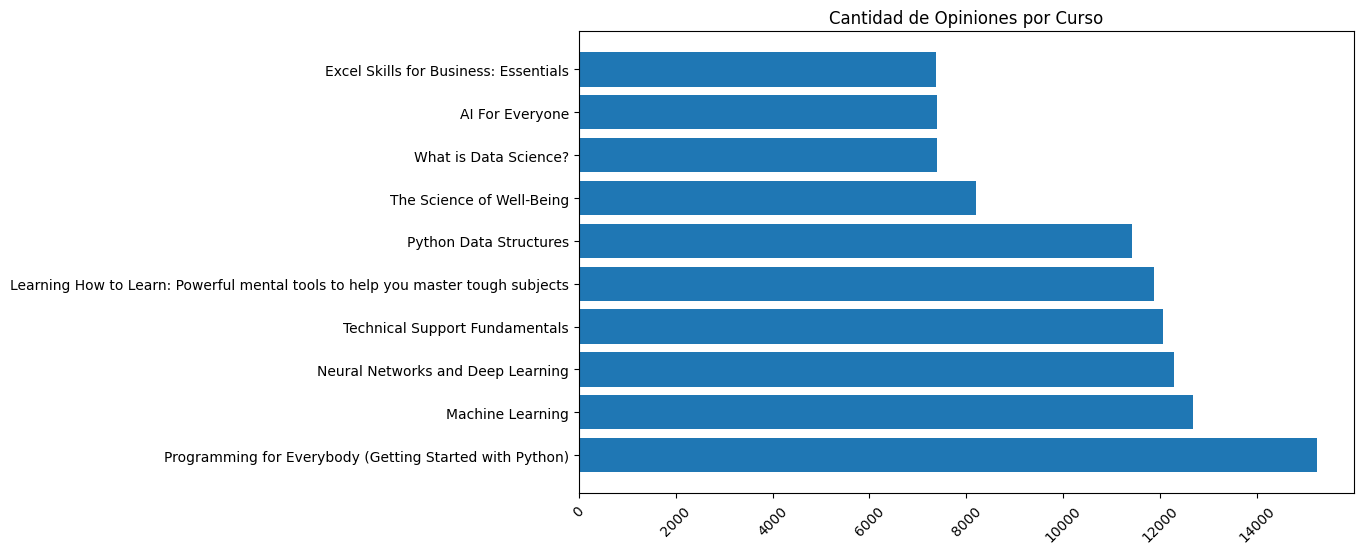

In [18]:
df_top_10 = df_cour_top100.head(10)
plt.figure(figsize=(10, 6))
plt.barh(df_top_10['titulo'], df_top_10['cantidad_opiniones'])
plt.xticks(rotation=45)
plt.title('Cantidad de Opiniones por Curso')
plt.show()

Se establece un nuevo filtro, que muestra un grafico del top 10 de los cursos con mayor cantidad de opiniones. A primera vista, en este filtro del dataset se puede observar que los primeros tres registros tienen que ver con programacion, machine learning e inteligencia artificial. <br>
Observemos con una nube de palabras mas detalles:

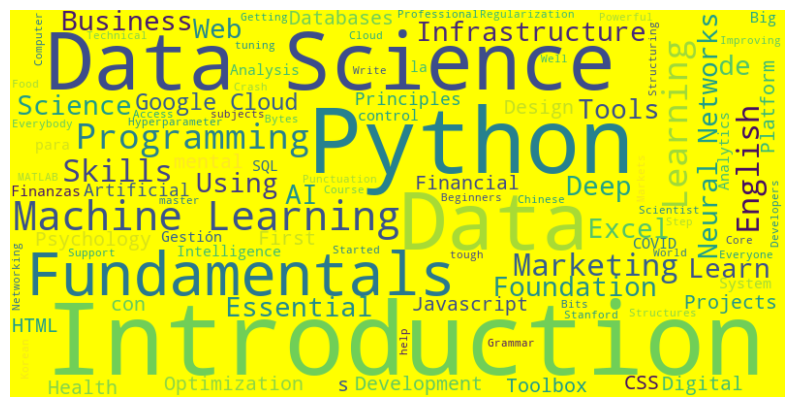

In [19]:
#Se crea la nube de palabras en base al dataframe filtrado con mayor cantidad de opiniones
titulos = df_cour_top100['titulo'].tolist()
text = ' '.join(titulos)
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='yellow').generate(text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

En este caso, se analiza el dataset de coursera filtrando por los primeros 100 cursos con mayor cantidad de opiniones (independientemente del tipo de opinion, este numero da un panorama sobre la popularidad y la llegada al publico de cada curso).<br>
De este filtro, se extrae mediante wordcloud, las palabras mas repetidas y de mayor peso en la busqueda.<br>
<br>
Esto nos lleva a la conclusion de que en la plataforma de coursera, hay una relacion muy cercana entre la popularidad del curso y las disciplinas del ambiente IT. <br> Palabras como DATA SCIENCE, DATA, PYTHON, MACHINE LEARNING, PROGRAMMING, son algunas de las que mas resaltan.<br>
La relacion entre los cursos con MAYOR PUNTAJE no era correlativa con su popularidad (numero de opiniones), en cambio con este ultimo planteo, se puede observar que los cursos relativos a la tecnologia de la informacion son los que se vuelven mas solicitados.

# DATAFRAME EDX (ETL - EDA)

In [20]:
# Elimino las columnas que no suman informacion al analisis

#df_edx = df_edx.drop("summary", axis=1)
#df_edx = df_edx.drop("instructors", axis=1)
#df_edx = df_edx.drop("subtitles", axis=1)
#df_edx = df_edx.drop("course_description", axis=1)
#df_edx = df_edx.drop("course_syllabus", axis=1)
#df_edx = df_edx.drop("course_url", axis=1)
#df_edx = df_edx.drop("course_effort", axis=1)

In [21]:
#Renombro las columnas y acomodo los datos de precio_certif_usd, lenguaje y duracion_semanas

#df_edx.columns = ['titulo', 'inscriptos',"tipo_curso","institucion","nivel","categoria","lenguaje","duracion_semanas","precio_certif_usd"]
#df_edx['precio_certif_usd'] = df_edx['precio_certif_usd'].str[37:]
#df_edx['precio_certif_usd'] = df_edx['precio_certif_usd'].str[:-4]
#df_edx['duracion_semanas'] = df_edx['duracion_semanas'].str[:-6]
#df_edx['lenguaje'] = df_edx['lenguaje'].replace('日本語', 'Japanese')

In [22]:
#Convierto los tipos de datos necesarios a numericos

#df_edx['inscriptos'] = df_edx['inscriptos'].str.replace(',', '')
#df_edx['inscriptos'] = pd.to_numeric(df_edx['inscriptos'], errors='coerce')
#df_edx['duracion_semanas'] = pd.to_numeric(df_edx['duracion_semanas'], errors='coerce')
#df_edx['precio_certif_usd'] = pd.to_numeric(df_edx['precio_certif_usd'], errors='coerce')

In [23]:
#Exporto el csv limpio

#df_edx.to_csv('dfLimpio/dfEdx.csv', index=False)

In [24]:
#Leo el csv limpio
df_edx = pd.read_csv("dfEdx.csv")

In [25]:
#Visualizo el df_edx limpio
df_edx.head()

,titulo,inscriptos,tipo_curso,institucion,nivel,categoria,lenguaje,duracion_semanas,precio_certif_usd
0,How to Learn Online,124980.0,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,2,49.0
1,Programming for Everybody (Getting Started wit...,293864.0,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,7,49.0
2,CS50's Introduction to Computer Science,2442271.0,Self-paced on your time,Harvard University,Introductory,Computer Science,English,12,90.0
3,The Analytics Edge,129555.0,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,13,199.0
4,Marketing Analytics: Marketing Measurement Str...,81140.0,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,4,249.0


In [26]:
#Visualizo la info del dataframe
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titulo             975 non-null    object 
 1   inscriptos         855 non-null    float64
 2   tipo_curso         975 non-null    object 
 3   institucion        975 non-null    object 
 4   nivel              975 non-null    object 
 5   categoria          975 non-null    object 
 6   lenguaje           975 non-null    object 
 7   duracion_semanas   975 non-null    int64  
 8   precio_certif_usd  975 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ KB


In [27]:
#Contabilizo los distintos valores de diferentes categorias
print("Conteo de columna tipo_curso\n")
print(df_edx["tipo_curso"].value_counts())

print("\nConteo de columna nivel\n")
print(df_edx["nivel"].value_counts())

print("\nConteo de columna lenguaje\n")
print(df_edx["lenguaje"].value_counts().head())

Conteo de columna tipo_curso

Self-paced on your time                917
Instructor-led on a course schedule     58
Name: tipo_curso, dtype: int64

Conteo de columna nivel

Introductory    621
Intermediate    267
Advanced         87
Name: nivel, dtype: int64

Conteo de columna lenguaje

English     777
Español     176
Français      7
Italiano      4
中文            4
Name: lenguaje, dtype: int64


In [28]:
#Contabilizo los distintos valores de diferentes categorias
print("\nConteo de columna duracion_semanas\n")
print(df_edx["duracion_semanas"].value_counts().head())

print("\nConteo de columna institucion\n")
print(df_edx["institucion"].value_counts().head())

print("\nConteo de columna categoria\n")
print(df_edx["categoria"].value_counts().head())


Conteo de columna duracion_semanas

4    194
6    187
5    148
7     92
8     84
Name: duracion_semanas, dtype: int64

Conteo de columna institucion

Harvard University                       104
Universitat Politècnica de Valencia       47
Massachusetts Institute of Technology     41
Delft University of Technology            30
IBM                                       30
Name: institucion, dtype: int64

Conteo de columna categoria

Computer Science              166
Business & Management         164
Data Analysis & Statistics     72
Humanities                     64
Engineering                    58
Name: categoria, dtype: int64


In [29]:
#Analizo las variables numericas de EDX
pd.set_option('display.float_format', '{:.2f}'.format)
df_edx.describe()

,inscriptos,duracion_semanas,precio_certif_usd
count,855.00,975.00,975.00
mean,53260.35,6.71,100.47
std,119030.86,3.15,69.57
min,5001.00,1.00,5.00
25%,11764.50,4.00,49.00
50%,24130.00,6.00,79.00
75%,54796.00,8.00,149.00
max,2442271.00,18.00,450.00


<Axes: ylabel='precio_certif_usd'>

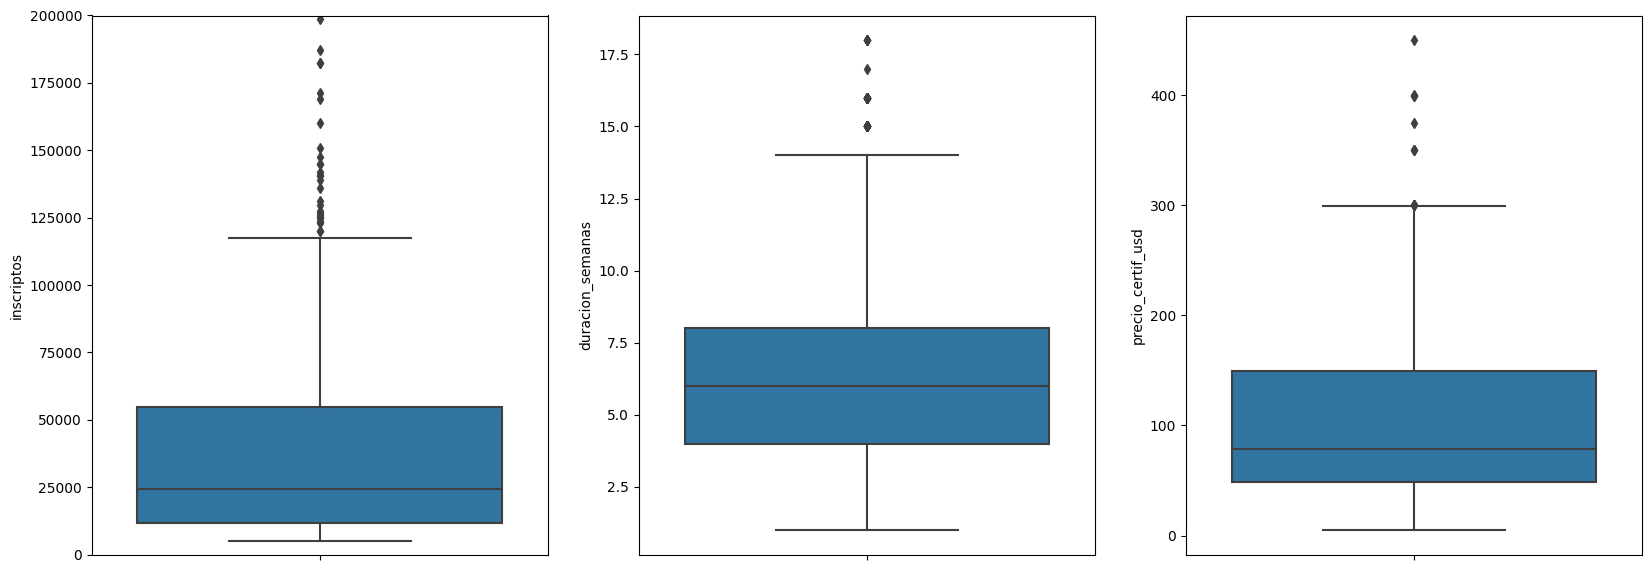

In [30]:
#Analizo con boxplot las variables numericas
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(131)
ax1.set_ylim(0, 200000)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.boxplot(data=df_edx, y="inscriptos", ax=ax1)
sns.boxplot(data=df_edx, y="duracion_semanas", ax=ax2)
sns.boxplot(data=df_edx, y="precio_certif_usd", ax=ax3)

En la columna de inscriptos, observamos que la mayoria rondan los 20 mil y 50 mil alumnos. Mientras que hay algunos cursos con valores muy altos, superando los 200 mil. <br>
En cuanto a la duracion (en semanas) de los cursos, se puede ver que la gran parte van de las 2 semanas a los 3 meses.
Finalmente el precio de los cursos, si bien todos son gratuitos, el valor del certificado oficial varia mayormente entre los 50 y 300 USD.

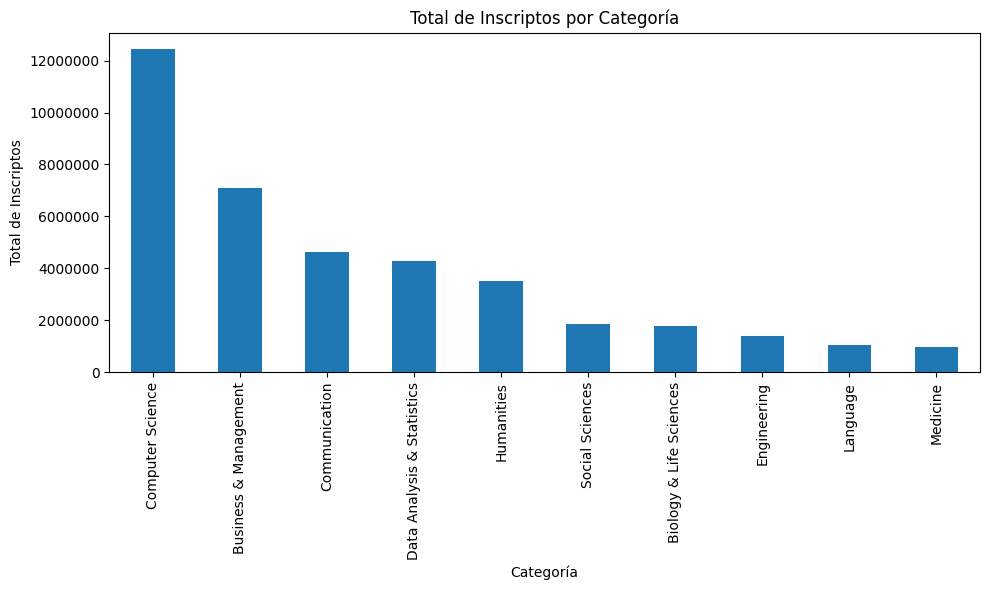

In [31]:
#Creo un filtro que agrupa las categorias y suma los inscriptos por cada una para poder graficarlo
categoria_inscriptos = df_edx.groupby('categoria')['inscriptos'].sum()
categoria_inscriptos = categoria_inscriptos.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
categoria_inscriptos.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Categoría')
plt.ylabel('Total de Inscriptos')
plt.title('Total de Inscriptos por Categoría')
plt.tight_layout()
plt.show()

En linea con el analisis realizado en la plataforma de coursera, el analisis de EDX también arroja que la mayor cantidad de inscriptos (por amplia diferencia) aplican para la categoria de ciencias de la computacion, y en una posicion tambien cercana, el analisis de datos.

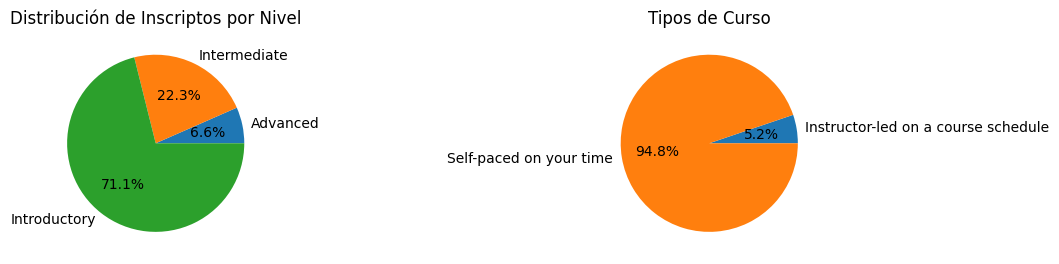

In [32]:
#Se crea un filtro con la cantidad de inscriptos en determinado nivel y posteriormente crear un grafico de pie.
nivel_inscriptos = df_edx.groupby('nivel')['inscriptos'].sum()
tipoCurso_inscriptos = df_edx.groupby('tipo_curso')['inscriptos'].sum()


labels1 = nivel_inscriptos.index
sizes1 = nivel_inscriptos.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%')
ax1.set_title('Distribución de Inscriptos por Nivel')

labels2 = tipoCurso_inscriptos.index
sizes2 = tipoCurso_inscriptos.values

ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%')
ax2.set_title('Tipos de Curso')

plt.subplots_adjust(wspace=1.5)
plt.show()

Se realiza un grafico de torta de inscriptos en cada nivel. El siguiente grafico nos brinda de informacion respecto a como los MOOCS son mayoritariamente buscados como puntapies para iniciarse en alguna carrera o disciplina en particular.<br> Tambien en el grafico que lo acompaña vemos que la modalidad elegida es casi por unanimidad la de "self-placed on your time". Esto nos muestra las nuevas formas de capacitacion que prefiere la gente a la hora de tomar esta clase de cursos. El hecho de poder estudiar a distancia y a su tiempo se vuelve sumamente importante.

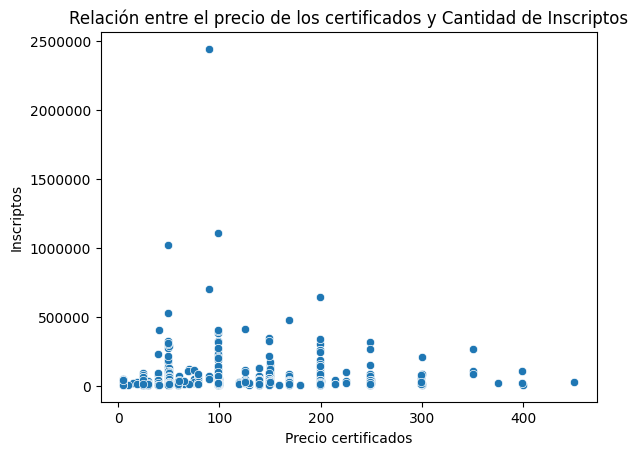

In [33]:
#Se establece un grafico para comparar 2 variables numericas como el precio de los certificados y los inscriptos
sns.scatterplot(data=df_edx, x='precio_certif_usd', y='inscriptos')

plt.xlabel('Precio certificados')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Inscriptos')
plt.title('Relación entre el precio de los certificados y Cantidad de Inscriptos')
plt.show()

Si bien la distribucion no esta fuertemente marcada, se puede observar levemente sesgada a la derecha, ya que la mayoria de las inscripciones se produce entre los 0 y 250USD por certificacion, disminuyendo a medida que se incrementa el precio.

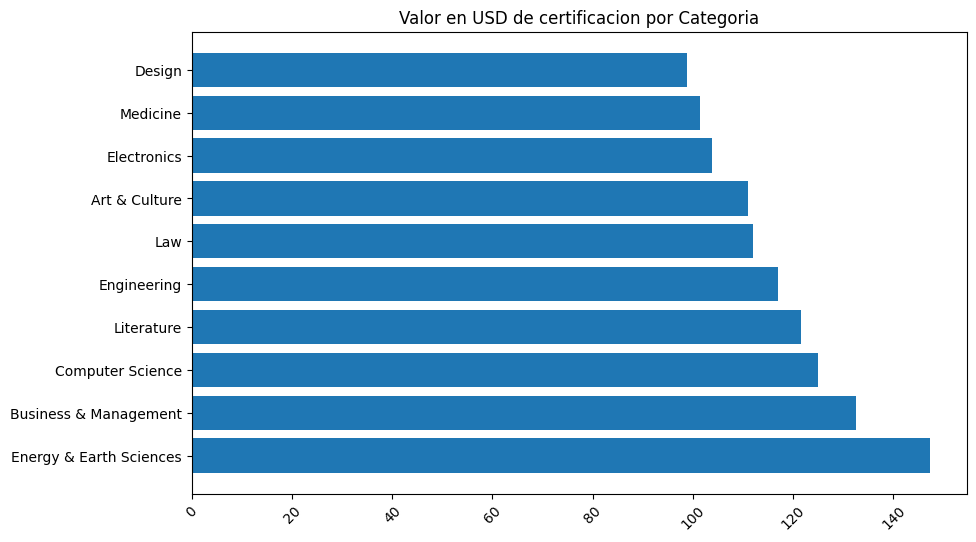

In [34]:
categoria_precio = df_edx.groupby('categoria')['precio_certif_usd'].mean()
categoria_precio = categoria_precio.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(categoria_precio.index, categoria_precio)
plt.xticks(rotation=45)
plt.title('Valor en USD de certificacion por Categoria')
plt.show()

En el top 10 de los cursos con certificacion mas costosa, en tercera posicion se encuentran los de la categoria Computer Science.<br> En linea con las observaciones anteriores, ya tenemos informacion sobre los cursos mas solicitados (en su gran mayoria disciplinas IT), y hay que tener en cuenta que tambien es una de las categorias con mayor valor del mercado.

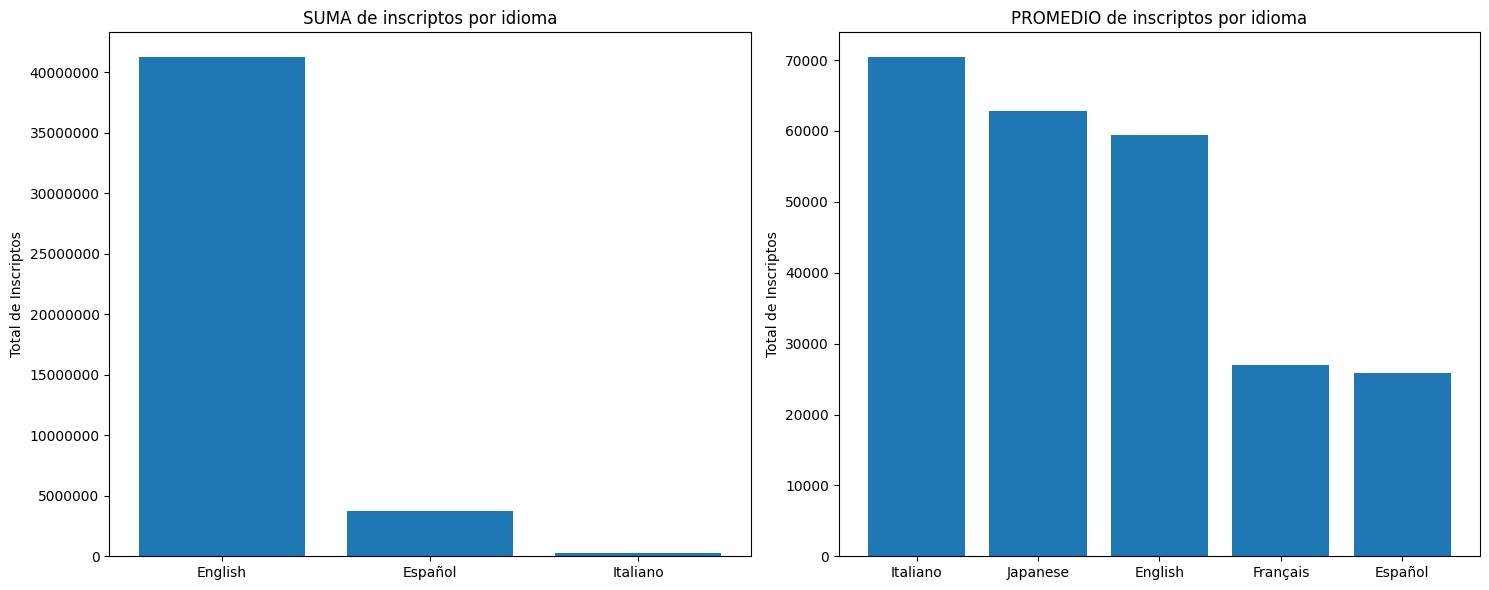

In [35]:
#Se crean filtros de suma de inscriptos por lenguaje, y promedio de inscriptos por lenguaje
lenguaje_inscriptos = df_edx.groupby('lenguaje')['inscriptos'].sum()
lenguaje_inscriptos = lenguaje_inscriptos.sort_values(ascending=False).head(3)

lenguaje_inscriptos_m = df_edx.groupby('lenguaje')['inscriptos'].mean()
lenguaje_inscriptos_m = lenguaje_inscriptos_m.sort_values(ascending=False).head(5)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Primer grafico
axes[0].bar(lenguaje_inscriptos.index, lenguaje_inscriptos)
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_ylabel('Total de Inscriptos')
axes[0].set_title('SUMA de inscriptos por idioma')

# Segundo grafico
axes[1].bar(lenguaje_inscriptos_m.index, lenguaje_inscriptos_m)
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].set_ylabel('Total de Inscriptos')
axes[1].set_title("PROMEDIO de inscriptos por idioma")

plt.tight_layout()
plt.show()

Si bien el idioma Ingles es el que mayor cantidad de inscriptos tiene, al realizar el grafico del promedio de la cantidad de inscriptos por cantidad de cursos en un lenguaje en particular, notamos que hay 5 idiomas que predominan el mercado con diferencias no tan significativas.
Esto muestra que probablemente, si hubiera mas cursos en el resto de los idiomas, también tendrian un numero bastante mas elevado de inscriptos.

Como conclusion del dataset de EDX, sumado a la conclusion de Coursera, podemos seguir infiriendo que los cursos mas populares y con mas inscripciones, son aquellos que tienen que ver con la tecnologia de la informacion, ademas de evidenciar que es una de las categorias que tiene mayor valor en el mercado para su certificacion.
Por otro lado se puede ver que los cursos introductorios son los que mas inscriptos tienen, y por amplia son elegidos aquellos que se hacen al tiempo de cada estudiante. Lo cual nos muestra que los MOOCS terminan siendo una alternativa muy buscada a la hora de comenzar a estudiar una disciplina (predominantemente IT), priorizando fundamentalmente la flexibilidad para realizarlos.

# DATAFRAME UDEMY (ETL - EDA)


In [36]:
# Elimino las columnas que no se van a usar para el analisis

#df_udemy = df_udemy.drop("course_id", axis=1)
#df_udemy = df_udemy.drop("num_reviews", axis=1)
#df_udemy = df_udemy.drop("num_lectures", axis=1)
#df_udemy = df_udemy.drop("url", axis=1)


In [37]:
#Renombro las columnas y creo la columna de ventas totales

#df_udemy.columns = ['titulo', 'es_pago',"precio_usd","inscriptos","nivel","duracion_hs","fecha_publicacion","categoria"]
#df_udemy["ventas_totales"] = df_udemy["precio_usd"] * df_udemy["inscriptos"]

In [38]:
#Le doy formato de fecha a la columna feha_publicacion

#df_udemy['fecha_publicacion'] = df_udemy['fecha_publicacion'].str[:10]
#df_udemy['año_publicacion'] = df_udemy['fecha_publicacion'].str[:4]
#df_udemy['fecha_publicacion'] = df_udemy['fecha_publicacion'].apply(lambda x: pd.to_datetime(x).date())

In [39]:
#Exporto el csv limpio

#df_udemy.to_csv('dfLimpio/dfUdemy.csv', index=False)

In [40]:
#Leo el csv limpio
df_udemy = pd.read_csv("dfUdemy.csv")

In [41]:
#Visualizo el df_cour limpio
df_udemy.head()

,titulo,es_pago,precio_usd,inscriptos,nivel,duracion_hs,fecha_publicacion,categoria,ventas_totales,año_publicacion
0,Ultimate Investment Banking Course,True,200,2147,All Levels,1.50,2017-01-18,Business Finance,429400,2017
1,Complete GST Course & Certification - Grow You...,True,75,2792,All Levels,39.00,2017-03-09,Business Finance,209400,2017
2,Financial Modeling for Business Analysts and C...,True,45,2174,Intermediate Level,2.50,2016-12-19,Business Finance,97830,2016
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,All Levels,3.00,2017-05-30,Business Finance,232845,2017
4,How To Maximize Your Profits Trading Options,True,200,1276,Intermediate Level,2.00,2016-12-13,Business Finance,255200,2016


In [42]:
#Visualizo la info del dataframe
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titulo             3678 non-null   object 
 1   es_pago            3678 non-null   bool   
 2   precio_usd         3678 non-null   int64  
 3   inscriptos         3678 non-null   int64  
 4   nivel              3678 non-null   object 
 5   duracion_hs        3678 non-null   float64
 6   fecha_publicacion  3678 non-null   object 
 7   categoria          3678 non-null   object 
 8   ventas_totales     3678 non-null   int64  
 9   año_publicacion    3678 non-null   int64  
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 262.3+ KB


In [43]:
#Contabilizo los distintos valores de diferentes categorias
print("Conteo de columna nivel\n")
print(df_udemy["nivel"].value_counts())

print("\nConteo de columna es_pago\n")
print(df_udemy["es_pago"].value_counts())

print("\nConteo de columna año_publicacion\n")
print(df_udemy["año_publicacion"].value_counts())

print("\nConteo de columna año_publicacion\n")
print(df_udemy["categoria"].value_counts())


Conteo de columna nivel

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: nivel, dtype: int64

Conteo de columna es_pago

True     3368
False     310
Name: es_pago, dtype: int64

Conteo de columna año_publicacion

2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: año_publicacion, dtype: int64

Conteo de columna año_publicacion

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: categoria, dtype: int64


In [44]:
#Analizo las variables numericas de udemy
df_udemy.describe()

,precio_usd,inscriptos,duracion_hs,ventas_totales,año_publicacion
count,3678.00,3678.00,3678.00,3678.00,3678.00
mean,66.05,3197.15,4.09,240598.51,2015.43
std,61.01,9504.12,6.05,1001404.24,1.19
min,0.00,0.00,0.00,0.00,2011.00
25%,20.00,111.00,1.00,1585.00,2015.00
50%,45.00,911.50,2.00,23065.00,2016.00
75%,95.00,2546.00,4.50,118750.00,2016.00
max,200.00,268923.00,78.50,24316800.00,2017.00


<Axes: ylabel='duracion_hs'>

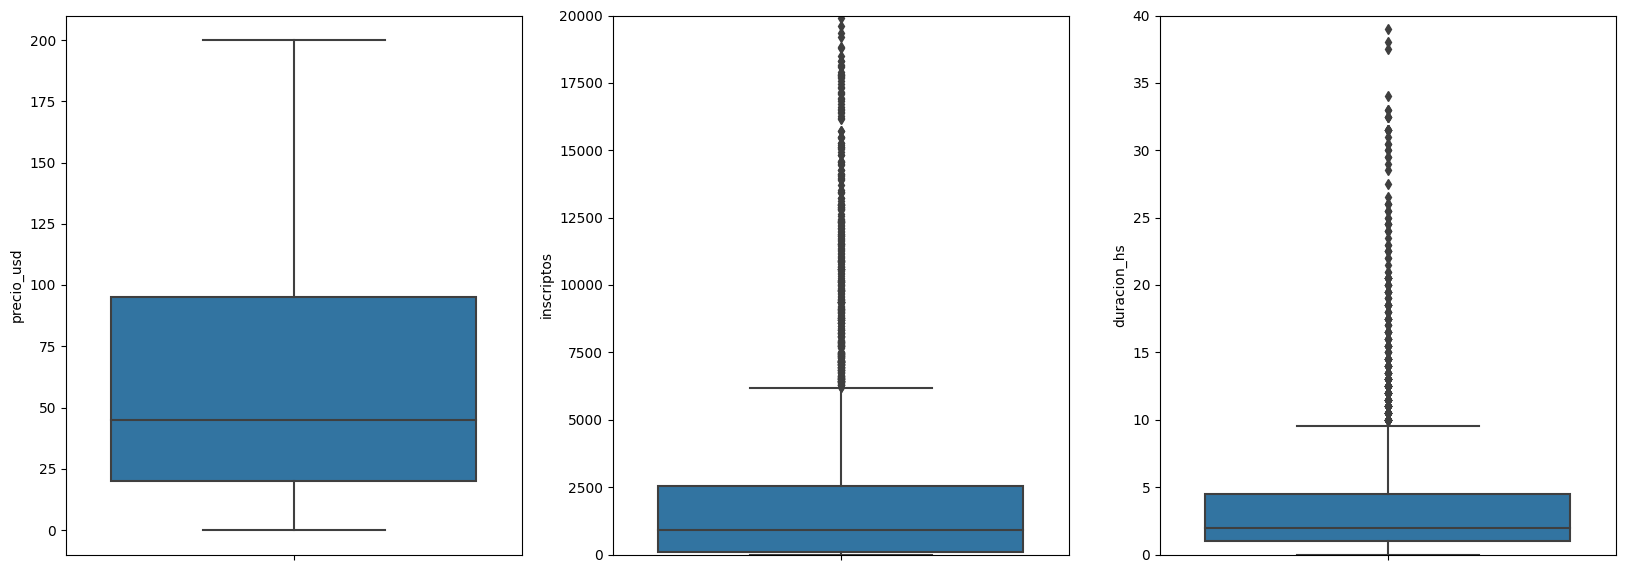

In [45]:
#Analizo con boxplot las variables numericas
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax2.set_ylim(0, 20000)
ax3 = fig.add_subplot(133)
ax3.set_ylim(0, 40)

sns.boxplot(data=df_udemy, y="precio_usd", ax=ax1)
sns.boxplot(data=df_udemy, y="inscriptos", ax=ax2)
sns.boxplot(data=df_udemy, y="duracion_hs", ax=ax3)

In [46]:
#Ordeno el dataframe con cantidad de inscriptos de mayor a menor, y observo los primeros 10
inscriptos_udemy = df_udemy.sort_values("inscriptos", ascending=False).head(10)
inscriptos_udemy

,titulo,es_pago,precio_usd,inscriptos,nivel,duracion_hs,fecha_publicacion,categoria,ventas_totales,año_publicacion
2827,Learn HTML5 Programming From Scratch,False,0,268923,All Levels,10.50,2013-02-14,Web Development,0,2013
3032,Coding for Entrepreneurs Basic,False,0,161029,Beginner Level,3.50,2013-06-09,Web Development,0,2013
3230,The Web Developer Bootcamp,True,200,121584,All Levels,43.00,2015-11-02,Web Development,24316800,2015
2783,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,Beginner Level,3.00,2014-04-08,Web Development,0,2014
3232,The Complete Web Developer Course 2.0,True,200,114512,All Levels,30.50,2016-03-08,Web Development,22902400,2016
1896,Free Beginner Electric Guitar Lessons,False,0,101154,Beginner Level,4.50,2012-06-15,Musical Instruments,0,2012
2589,Web Design for Web Developers: Build Beautiful...,False,0,98867,All Levels,3.00,2015-04-13,Web Development,0,2015
2619,Learn Javascript & JQuery From Scratch,True,30,84897,All Levels,2.00,2013-10-10,Web Development,2546910,2013
3289,Practical PHP: Master the Basics and Code Dyna...,False,0,83737,All Levels,6.50,2014-07-19,Web Development,0,2014
3247,JavaScript: Understanding the Weird Parts,True,175,79612,All Levels,11.50,2015-03-12,Web Development,13932100,2015


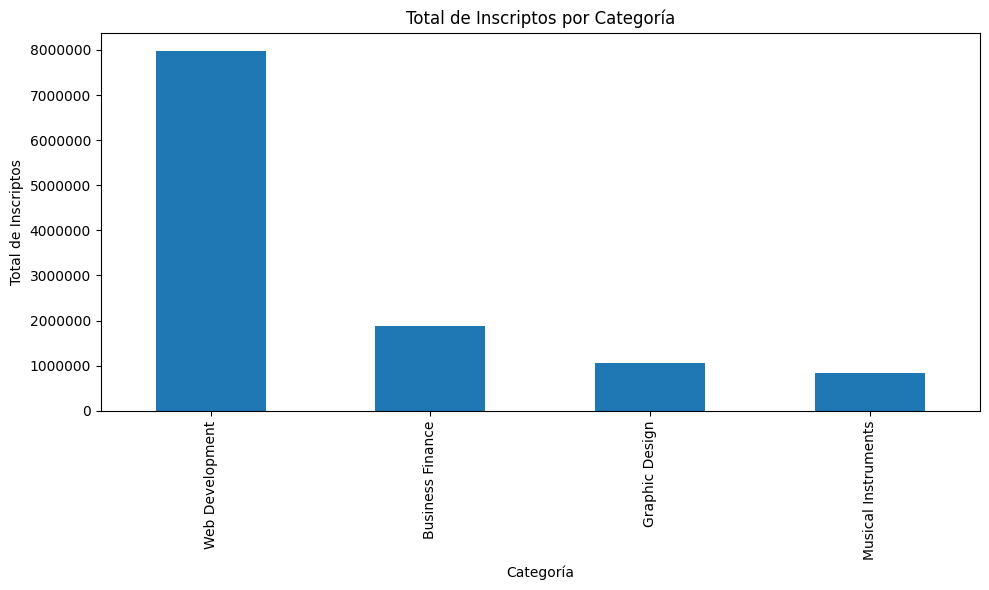

In [47]:
#Creo un filtro que agrupa las categorias y suma los inscriptos por cada una para poder graficarlo
categoria_inscriptos_udemy= df_udemy.groupby('categoria')['inscriptos'].sum()
categoria_inscriptos_udemy = categoria_inscriptos_udemy.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
categoria_inscriptos_udemy.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Categoría')
plt.ylabel('Total de Inscriptos')
plt.title('Total de Inscriptos por Categoría')
plt.tight_layout()
plt.show()

Se vuelve a comprobar, como lo visto anteriormente con EDX, que con la academia udemy, que los primeros 10 cursos con mayor cantidad de inscriptos provienen de disciplinas relacionadas la tecnologia de la informacion. Tambien se ve en el grafico que por amplia diferencia de inscriptos las capacitaciones de este rubro son las mas requeridas de los cursos en linea y masivos.

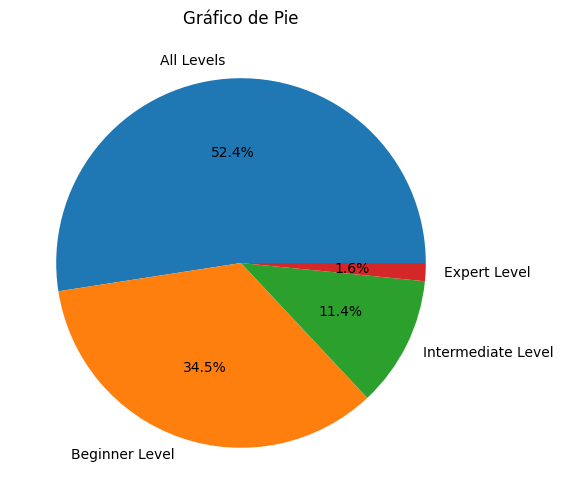

In [48]:
# Grafico el porcentaje de los diferentes tipos de niveles de los cursos
valores = df_udemy["nivel"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=valores.index, autopct='%1.1f%%')
plt.title('Gráfico de Pie')
plt.show()

Exceptuando los cursos que contienen los 3 niveles de dificultad, volvemos a observar que los cursos para nivel principiante son los que predominan en el mercado, como fue en el caso de EDX. Reforzando la idea de que los MOOCS suelen ser plataformas de insercion en nuevas disciplinas, sobre todo las de IT.

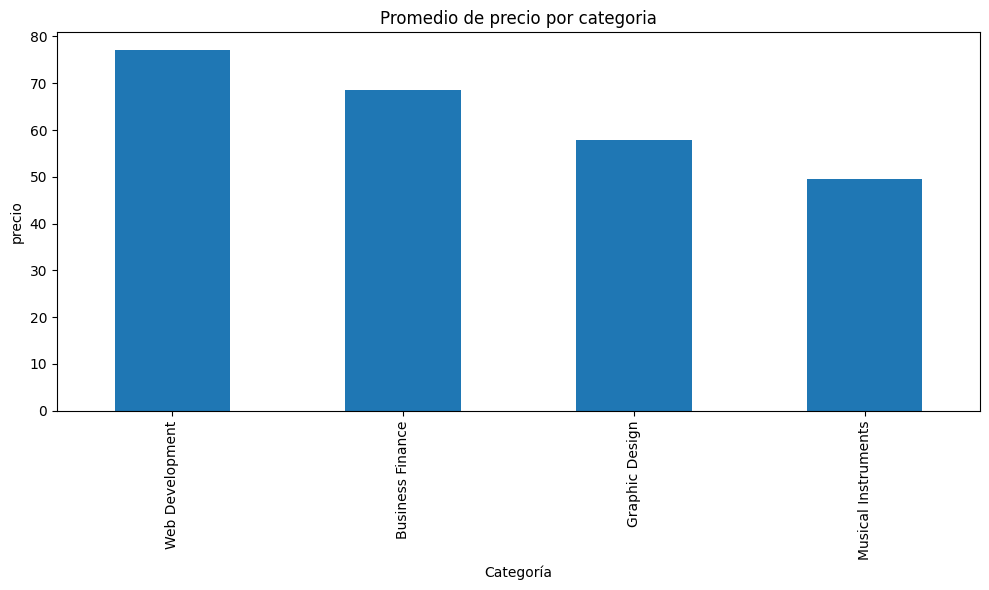

In [49]:
#Creo un filtro que agrupa las categorias y el promedio de los precios por cada una para poder graficarlo
categoria_precio_udemy= df_udemy.groupby('categoria')['precio_usd'].mean()
categoria_precio_udemy = categoria_precio_udemy.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
categoria_precio_udemy.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Categoría')
plt.ylabel('precio')
plt.title('Promedio de precio por categoria')
plt.tight_layout()
plt.show()

Tambien se refuerza el concepto de que el rubro IT posee los valores mas altos del mercado.

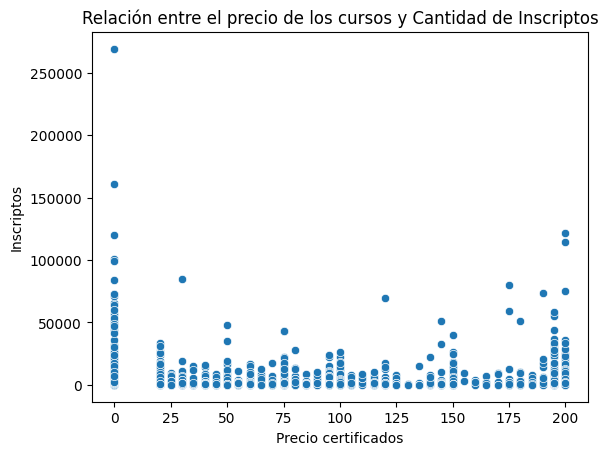

In [50]:
sns.scatterplot(data=df_udemy, x='precio_usd', y='inscriptos')

plt.xlabel('Precio certificados')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Inscriptos')
plt.title('Relación entre el precio de los cursos y Cantidad de Inscriptos')
plt.show()

Asi como lo analizado en la plataforma de EDX, no se observan notorias preferencias de los inscriptos por cursos de mayor o menor precio.

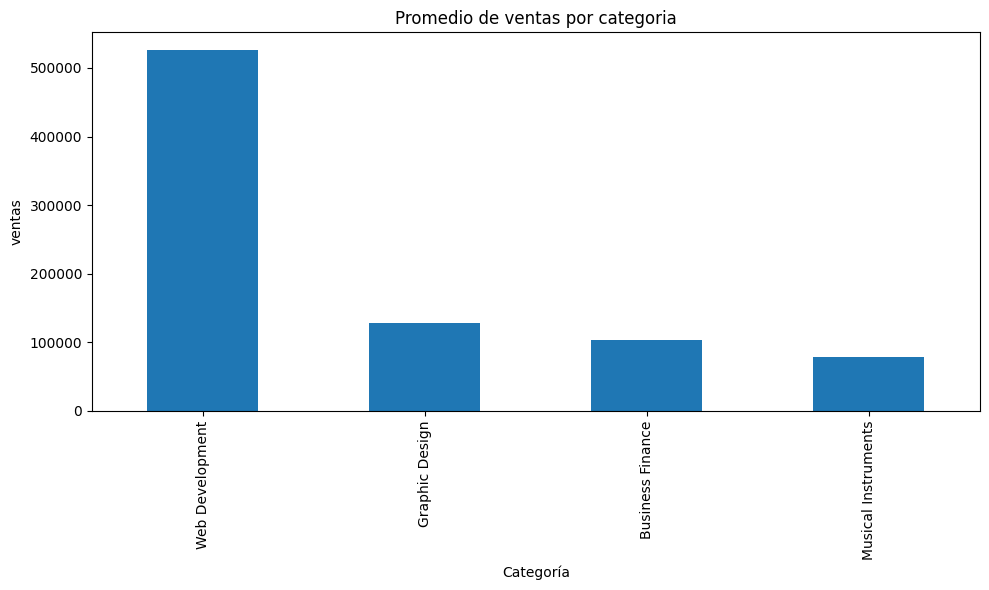

In [51]:
#Creo un filtro que agrupa las categorias y calcula el promedio de las ventas de sus cursos
categoria_ventas_udemy= df_udemy.groupby('categoria')['ventas_totales'].mean()
categoria_ventas_udemy = categoria_ventas_udemy.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
categoria_ventas_udemy.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Categoría')
plt.ylabel('ventas')
plt.title('Promedio de ventas por categoria')
plt.tight_layout()
plt.show()

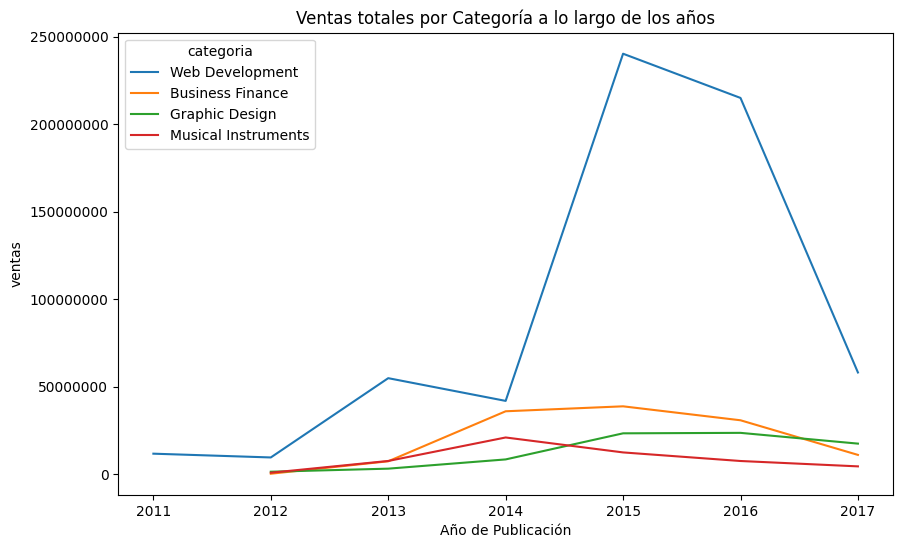

In [52]:
#Agrupo por categoria y año de publicacion para mostrar las ventas totales.
ventas_por_categoria= df_udemy.groupby(['categoria', 'año_publicacion'])["ventas_totales"].sum().reset_index()
ventas_por_categoria = ventas_por_categoria.sort_values('año_publicacion')

plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_por_categoria, x='año_publicacion', y='ventas_totales', hue='categoria')

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Año de Publicación')
plt.ylabel('ventas')
plt.title('Ventas totales por Categoría a lo largo de los años')
plt.show()

In [53]:
#Filtro los cursos con cantidad de inscriptos mayor a 0, y realizo agrupamientos por promedio de inscriptos en los pagos y no pagos
df_udemy_analisis = df_udemy[df_udemy['inscriptos'] > 0]

df_udemy_pago = df_udemy_analisis[df_udemy_analisis['es_pago'] == True]
df_udemy_noPago = df_udemy_analisis[df_udemy_analisis['es_pago'] == False]

pago_agrupado = df_udemy_pago.groupby('año_publicacion')['inscriptos'].mean()
noPago_agrupado = df_udemy_noPago.groupby('año_publicacion')['inscriptos'].mean()

#Filtro la cantidad de cursos pagos y no pagos que se dieron por año
cursos_pago_por_año = df_udemy_pago.groupby('año_publicacion')['titulo'].count()
cursos_noPago_por_año = df_udemy_noPago.groupby('año_publicacion')['titulo'].count()



In [54]:
df_udemy_pago["inscriptos"].sum()

8183595

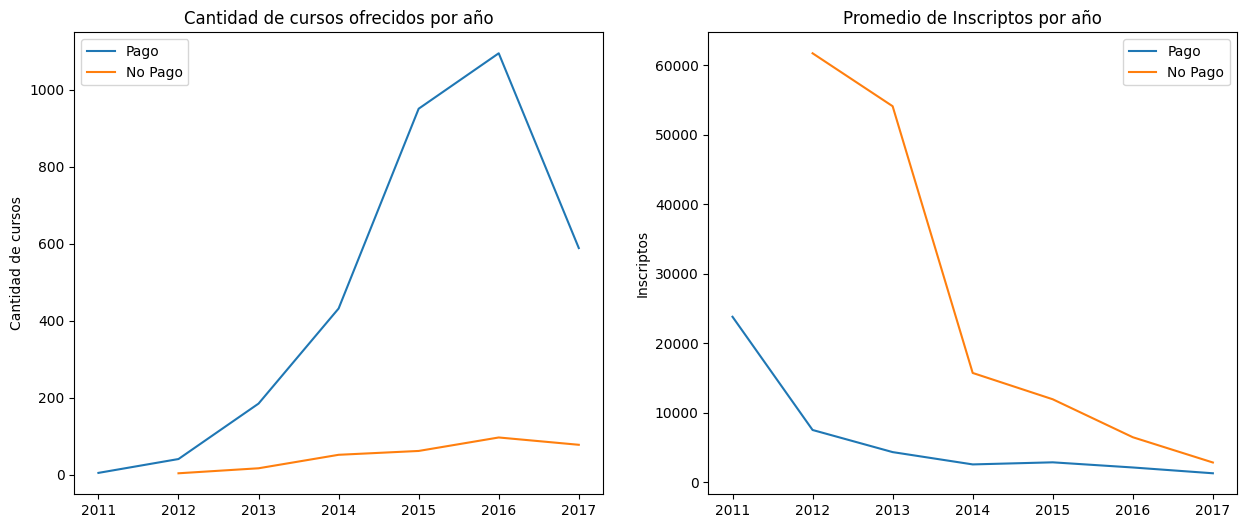

In [55]:
#Realizo dos graficos comparativos entre el promedio de inscriptos y la cantidad de cursos pagos y no pagos ofrecidos.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(cursos_pago_por_año.index, cursos_pago_por_año.values, label='Pago')
axes[0].plot(cursos_noPago_por_año.index, cursos_noPago_por_año.values, label='No Pago')
axes[0].set_title('Cantidad de cursos ofrecidos por año')
axes[0].set_ylabel('Cantidad de cursos')
axes[0].legend()


axes[1].plot(pago_agrupado.index, pago_agrupado.values, label='Pago')
axes[1].plot(noPago_agrupado.index, noPago_agrupado.values, label='No Pago')
axes[1].set_ylabel('Inscriptos')
axes[1].set_title('Promedio de Inscriptos por año')
axes[1].legend()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

En cuanto a los cursos pagos, se observa que el promedio de inscriptos a estos, del 2012 en adelante practicamente se mantienen sin mayores variaciones, incluso habiando aumentado la oferta de los mismos. Lo que indica que la cantidad de inscripciones tuvo que aumentar.<br>
En cambio, la cantidad de cursos gratuitos ofrecidos se mantiene estable (aunque son pocos) a lo largo de los años, pero se observa una notoria caida del promedio de inscripcion a estos. Por lo que la cantidad de inscriptos bajo notoriamente. <br>
Esto probablemente se deba a una politica de la academia queriendo aumentar su rentabilidad y sumar mayor cantidad de inscriptos pagos.
(Notese que en el año 2017 solo hay registros hasta julio, de ahi la caida en el grafico)

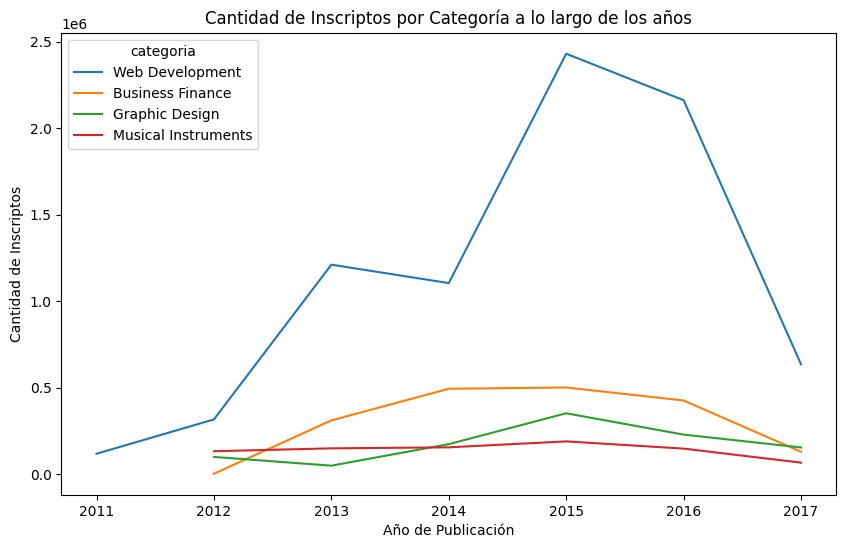

In [56]:
inscriptos_por_categoria= df_udemy.groupby(['categoria', 'año_publicacion'])['inscriptos'].sum().reset_index()
inscriptos_por_categoria = inscriptos_por_categoria.sort_values('año_publicacion')

# Crear el gráfico de líneas utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=inscriptos_por_categoria, x='año_publicacion', y='inscriptos', hue='categoria')

# Establecer etiquetas de los ejes y título del gráfico
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Inscriptos')
plt.title('Cantidad de Inscriptos por Categoría a lo largo de los años')

# Mostrar el gráfico
plt.show()

Volviendo a poner la lupa en el rubro IT, observamos su comparacion de inscriptos por año con las demas categorias, la demanda de inscriptos es notoriamente mas grande conforme avanza el tiempo, lo que demuestra el interes creciente por este tipo de cursos en el mercado.

# KPI

La tasa de conversión de inscriptos gratuitos a inscriptos pagados: se calcula como el (número de inscriptos en cursos pagados / número de inscriptos en cursos gratuitos) * 100. <br> Objetivo: lograr incrementar esta tasa en un 15% en comparación con el año anterior.

In [58]:
#TASA DE CONVERSION
TasaConversion = (df_udemy_pago["inscriptos"].sum()/df_udemy_noPago["inscriptos"].sum())*100
print (f"La tasa de conversion de gratuitos a pagados es: {round(TasaConversion,2)}")


La tasa de conversion de gratuitos a pagados es: 228.88



### Se propone canalizar el mercado hacia los cursos y capacitaciones del rubro IT, con lo cual se establecen 3 KPI anuales para este objetivo


**Ventas totales IT**: se calcula como la suma total del precio de los cursos IT que son pagos, por la cantidad de inscriptos. <br>
Objetivo: Lograr incrementar las ventas anuales en un 5%.<br>
<br>
Este KPI permite evaluar el rendimiento y el exito de las estrategias de ventas de la plataforma en lo que respecta a los cursos de IT. Al establecer un objetivo de incremento mensual del 15%, se busca impulsar el crecimiento constante de las ventas en el tiempo.

In [ ]:
udemy_IT = df_udemy['categoria'] == 'Web Development'
udemy_IT = df_udemy[udemy_IT]

In [ ]:
ventas_Totales_It = (udemy_IT["precio_usd"] * udemy_IT["inscriptos"]).sum()
print(f"La suma de ventas totales del rubro IT es de: {ventas_Totales_It}")

La suma de ventas totales del rubro IT es de: 630843775


**Promedio Inscripciones IT:** se calcula como la cantidad de inscriptos a cursos IT sobre la cantidad de cursos ofrecidos *100. <br> Objetivo: incrementar las inscripciones IT en un 20%  anual. <br>
<br>
Este KPI muestra una medida del exito en la atraccion de inscripciones a los cursos IT, considerando tanto la cantidad de inscritos como la oferta de cursos disponibles. Al establecer un objetivo anual de incremento del 20%, se busca impulsar el crecimiento sostenido de las inscripciones en el tiempo.

In [ ]:
prom_Insc_It = (udemy_IT["inscriptos"].sum() / udemy_IT["titulo"].count())*100
print(f"El promedio de inscripciones IT es de {round(Prom_Insc_It,2)} por curso")

El promedio de inscripciones IT es de 665047.67 por curso


**Oferta de Cursos IT:**  se expresa como la totalidad de cursos IT que ofrece la plataforma. <br>
Objetivo: aumentar en un 5% la oferta delos cursos IT con respecto al año anterior<br>
<br>
Se busca canalizar la oferta en el rubro IT al haber visto que la demanda de conocimientos y habilidades especializadas es alta debido a la rapida evolucion de la industria. Al aumentar la cantidad de cursos en IT, la plataforma puede abordar esta demanda creciente y captar la atencion de un publico objetivo interesado en adquirir habilidades en este campo.

In [ ]:
oferta_It = udemy_IT["titulo"].count()
oferta_It

1200


# Conclusion <br>
---

Se analizaron distintos aspectos de las ofertas academicas en los MOOCS, los mas relevantes son: <br>
<br>
**NIVEL y MODALIDAD:** Se puede concluir que el nivel de principiantes es el mas solicitado por los cursantes. Esto, sumado a que la eleccion de la modalidad ampliamente mas elegida fue la de "hacerlo a tu tiempo", muestran que este tipo de ofertas resultan las mas flexibles y comodas a la hora de elegir iniciar un curso o capacitacion.
<br>
**IDIOMAS:** Si bien mayoritariamente el idioma predominante es el Ingles, se pudo observar que otros como Español, Italiano, Japones, Frances, tienen un gran promedio de inscriptos con respecto a la cantidad de cursos ofrecidos.
<br>
**PRECIO:** Los cursos mas costosos tienen que ver con disciplinas tales como Ciencias, Computacion, Negocios. Tambien se tiene en cuenta que no existe una eleccion concreta en base a sus precios.<br>
**RATING:** El analisis de los cursos por puntaje, no arroja conclusiones certeras, los cursos mejor puntuados son ampliamente variados en categorias y tambien en la cantidad de inscriptos.
<br>
<br>
**CATEGORIA:** Si bien se solicito analizar los aspectos mencionados, y tienen relevancia, es fundamental agregar y tener en cuenta la CATEGORIA. Este termina siendo el aspecto mas importante del analisis a la hora de pensar en la demanda de los productos vendidos, la CATEGORIA muestra contundentemente que la disciplina de IT ( Tecnologia de la informacion ) es la mas buscada.<br>
Cursos de programacion, ciencia de datos, machine learning, inteligencia artificial, entre otros, encabezan las listas de los mas vendidos y populares en las 3 academias.<br>
Por lo que a la hora de sumarse al mercado de cursos online, esta rama de estudios termina siendo muy solicitada y son mayoritariamente las mas costosas. Tambien es importante sumar que con la llegada de las nuevas tecnologias y el auge de la inteligencia artificial, el uso de datos y las ciencias de la computacion van en constante crecimiento.